In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 20)

df = pd.read_csv("../data/raw/coaster_db.csv")

df.shape


(1087, 56)

In [2]:
df.shape[0]

1087

In [3]:
df.head()


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [5]:
df.dtypes

coaster_name         object
Length               object
Speed                object
Location             object
Status               object
                     ...   
height_value        float64
height_unit          object
height_ft           float64
Inversions_clean      int64
Gforce_clean        float64
Length: 56, dtype: object

In [6]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [7]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [8]:
df = df[
    [
        "coaster_name",
        # "Length",
        # "Speed",
        "Location",
        "Status",
        # "Opening date",
        # "Type",
        "Manufacturer",
        # "Height restriction",
        # "Model",
        # "Height",
        # "Inversions",
        # "Lift/launch system",
        # "Cost",
        # "Trains",
        # "Park section",
        # "Duration",
        # "Capacity",
        # "G-force",
        # "Designer",
        # "Max vertical angle",
        # "Drop",
        # "Soft opening date",
        # "Fast Lane available",
        # "Replaced",
        # "Track layout",
        # "Fastrack available",
        # "Soft opening date.1",
        # "Closing date",
        "Opened",
        # "Replaced by",
        # "Website",
        # "Flash Pass Available",
        # "Must transfer from wheelchair",
        # "Theme",
        # "Single rider line available",
        # "Restraint Style",
        # "Flash Pass available",
        # "Acceleration",
        # "Restraints",
        # "Name",
        "year_introduced",
        "latitude",
        "longitude",
        # "Type_Main",
        "opening_date_clean",
        # "speed1",
        # "speed2",
        # "speed1_value",
        # "speed1_unit",
        "speed_mph",
        # "height_value",
        # "height_unit",
        "height_ft",
        "Inversions_clean",
        "Gforce_clean",
    ]
].copy()

In [9]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
Opened                 object
year_introduced         int64
latitude              float64
longitude             float64
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [10]:
# Setup Types
df["year_introduced"] = pd.to_numeric(df["year_introduced"], errors="coerce")
df["opening_date_clean"] = pd.to_datetime(df["opening_date_clean"], errors="coerce")
df["speed_mph"] = pd.to_numeric(df["speed_mph"], errors="coerce")
df["height_ft"] = pd.to_numeric(df["height_ft"], errors="coerce")
df["Inversions_clean"] = pd.to_numeric(df["Inversions_clean"], errors="coerce")
df["Gforce_clean"] = pd.to_numeric(df["Gforce_clean"], errors="coerce")
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")

In [11]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
Opened                        object
year_introduced                int64
latitude                     float64
longitude                    float64
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [12]:
# Check for missing values
df.isnull().sum()
df.isna().sum() / df.shape[0]
# df = df.dropna(subset=["year_introduced", "speed_mph", "height_ft", "Inversions_clean", "Gforce_clean", "latitude"])  # Drop missing values
# df.isnull().sum()


coaster_name          0.000000
Location              0.000000
Status                0.195952
Manufacturer          0.054278
Opened                0.975161
year_introduced       0.000000
latitude              0.252990
longitude             0.252990
opening_date_clean    0.229991
speed_mph             0.137994
height_ft             0.842686
Inversions_clean      0.000000
Gforce_clean          0.666973
dtype: float64

In [13]:
# Rename Columns
# df.columns = [
#    "Name",
#     "Location",
#     "Manufacturer",
#     "Opened",
#     "Year",
#     "Latitude",
#     "Longitude",
#     "Type",
#     "Opening Date",
#     "Speed",
#     "Height",
#     "Inversions",
#     "Gforce",
# ]
df.rename(
    columns={
        "coaster_name": "Coaster_name",
        "year_introduced": "Year_Introduced",
        "opening_date_clean": "Opening_Date",
        "speed_mph": "Speed_mph",
        "height_ft": "Height_ft",
        "Inversions_clean": "Inversions",
        "Gforce_clean": "Gforce",
    },
    inplace=True,
)
df.head()


,Coaster_name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,1901-01-01,NaN,NaN,1,NaN


In [14]:
df.duplicated(subset=["Coaster_name"])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [15]:
df.loc[df["Coaster_name"] == "Derby Racer"]


,Coaster_name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
14,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1911,42.42,-70.986,1911-01-01,NaN,NaN,0,NaN
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1937,42.42,-70.986,1911-01-01,NaN,NaN,0,NaN


In [16]:
# Check for duplicates in Name
df.loc[df.duplicated(subset=["Coaster_name"])]

,Coaster_name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1937,42.4200,-70.9860,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,NaN,1938,41.6349,-80.3180,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1980,NaN,NaN,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,NaN,1986,43.8427,-79.5423,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,NaN,2021,40.1343,-74.4434,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,NaN,2021,41.6343,-80.3165,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,NaN,2022,28.0339,-82.4231,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,NaT,53.0,NaN,3,4.7


In [17]:
#  why are there duplicates? check an example
df.query("Coaster_name == 'Crystal Beach Cyclone'")

,Coaster_name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1926,42.8617,-79.0598,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,1926-01-01,60.0,NaN,0,4.0


In [18]:
df = df.loc[
    ~df.duplicated(subset=["Coaster_name", "Location", "Opening_Date"])
].reset_index(drop=True)
df.shape

(990, 13)

In [19]:
df["Year_Introduced"].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1952     1
1956     1
1961     1
1955     1
1959     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

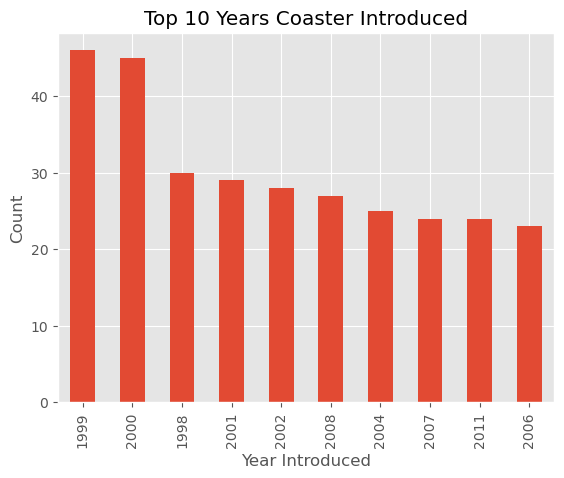

In [20]:
ax = (
    df["Year_Introduced"]
    .value_counts()
    .head(10)
    .plot(kind="bar", title="Top 10 Years Coaster Introduced")
)

ax.set_xlabel("Year Introduced")
ax.set_ylabel("Count")

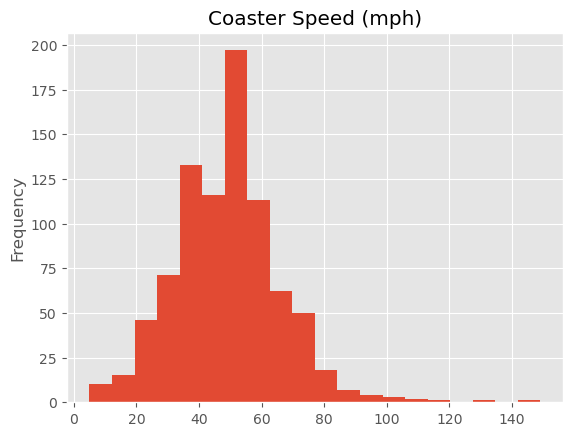

In [21]:
ax = df["Speed_mph"].plot(kind="hist", bins=20, title="Coaster Speed (mph)")

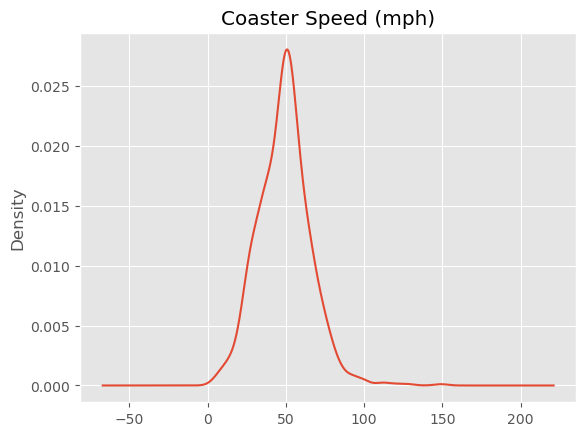

In [22]:
ax = df["Speed_mph"].plot(kind="kde", title="Coaster Speed (mph)")

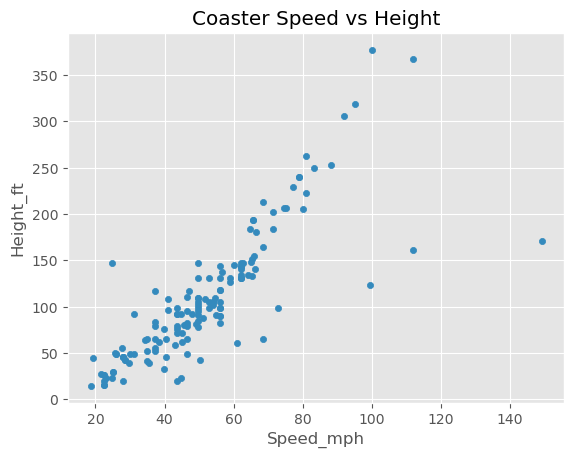

In [23]:
df.plot(kind="scatter", x="Speed_mph", y="Height_ft", title="Coaster Speed vs Height")
plt.show()

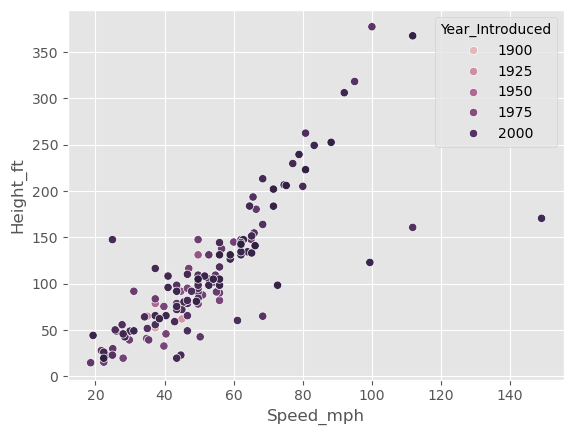

In [24]:
sns.scatterplot(x="Speed_mph", y="Height_ft", hue="Year_Introduced", data=df)
plt.show()

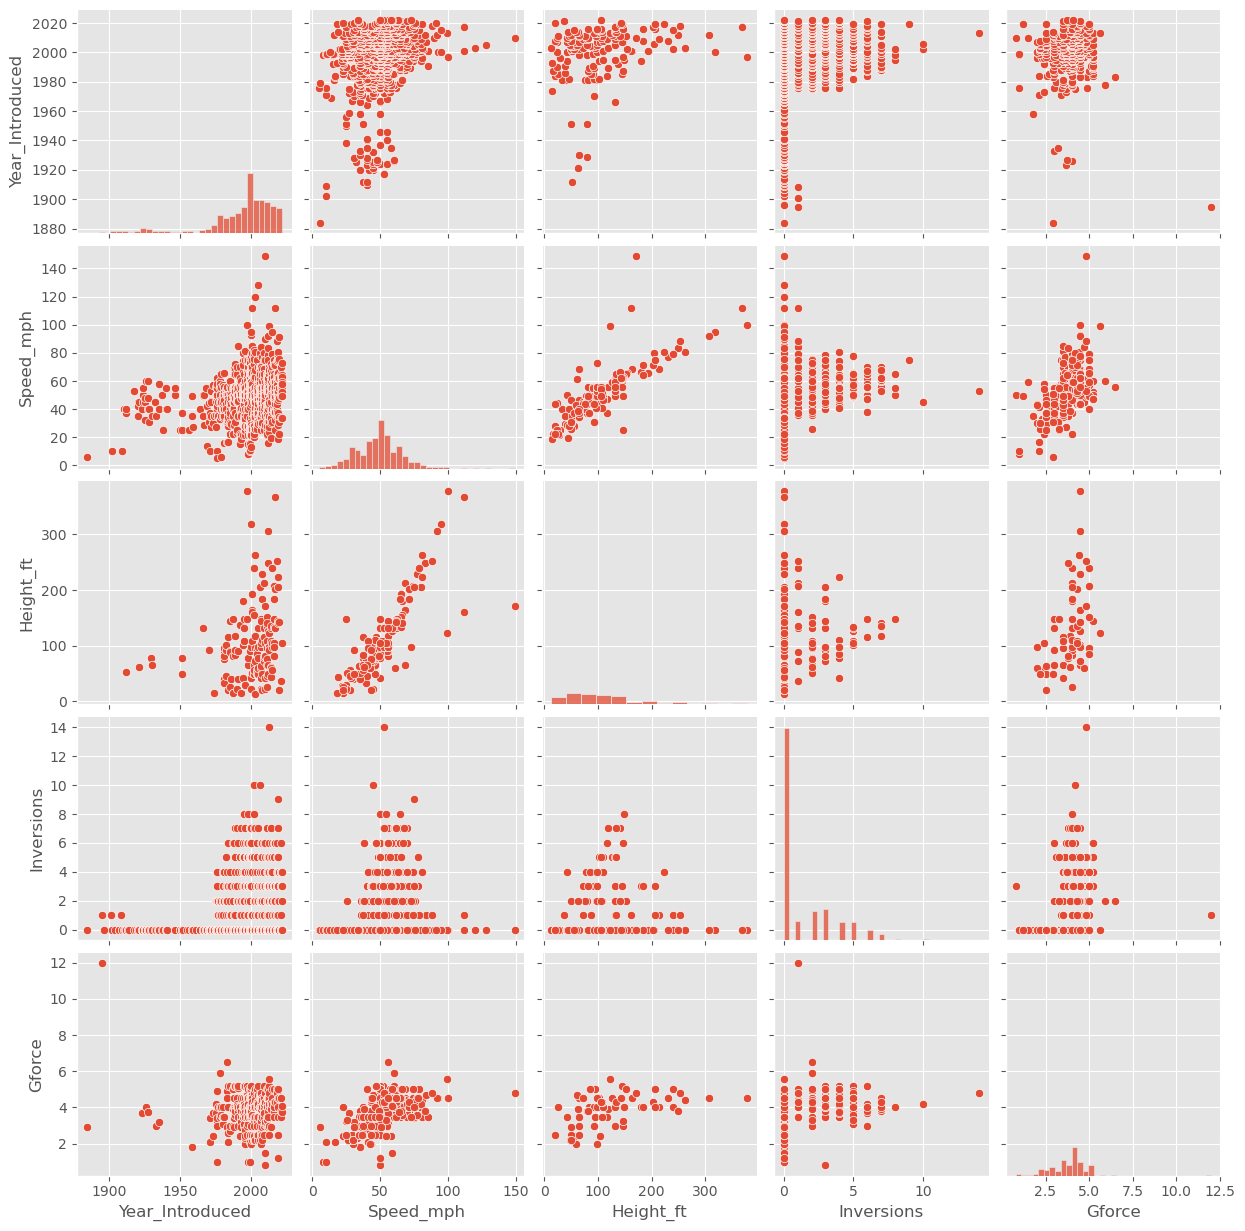

In [25]:
sns.pairplot(
    df, vars=["Year_Introduced", "Speed_mph", "Height_ft", "Inversions", "Gforce"]
)
plt.show()